In [2]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import time

In [3]:
# Load the existing per 100 possessions data
df_per100 = pd.read_csv('100pos2022-23.csv')

# Display the first few rows to confirm we've loaded it correctly
print(df_per100.head())

   Rk           Player  Age Team Pos   G  GS    MP    FG   FGA  ...  AST  STL  \
0   1    Mikal Bridges   26  2TM  SG  83  83  2963   9.8  20.9  ...  4.5  1.5   
1   2    Mikal Bridges   26  PHO  SF  56  56  2040   8.5  18.3  ...  4.8  1.6   
2   3    Mikal Bridges   26  BRK  SG  27  27   923  12.6  26.6  ...  3.8  1.4   
3   4  Anthony Edwards   21  MIN  SG  79  79  2842  11.8  25.8  ...  5.9  2.1   
4   5      Zach LaVine   27  CHI  SG  77  77  2768  11.8  24.4  ...  5.8  1.2   

   BLK  TOV   PF   PTS  ORtg  DRtg  Awards  Player-additional  
0  1.0  2.1  2.6  27.6   118   115     NaN          bridgmi01  
1  1.1  1.9  2.8  23.1   118   114     NaN          bridgmi01  
2  0.8  2.6  2.3  37.3   117   116     NaN          bridgmi01  
3  1.0  4.3  3.1  32.5   106   113      AS          edwaran01  
4  0.3  3.4  2.8  33.7   116   115     NaN          lavinza01  

[5 rows x 34 columns]


In [4]:
df_per100.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Awards,Player-additional
0,1,Mikal Bridges,26,2TM,SG,83,83,2963,9.8,20.9,...,4.5,1.5,1.0,2.1,2.6,27.6,118,115,NaN,bridgmi01
1,2,Mikal Bridges,26,PHO,SF,56,56,2040,8.5,18.3,...,4.8,1.6,1.1,1.9,2.8,23.1,118,114,NaN,bridgmi01
2,3,Mikal Bridges,26,BRK,SG,27,27,923,12.6,26.6,...,3.8,1.4,0.8,2.6,2.3,37.3,117,116,NaN,bridgmi01
3,4,Anthony Edwards,21,MIN,SG,79,79,2842,11.8,25.8,...,5.9,2.1,1.0,4.3,3.1,32.5,106,113,AS,edwaran01
4,5,Zach LaVine,27,CHI,SG,77,77,2768,11.8,24.4,...,5.8,1.2,0.3,3.4,2.8,33.7,116,115,NaN,lavinza01


In [5]:
import pandas as pd
import numpy as np

def enhance_stats_with_context(df):
    df_new = df.copy()
    
    # Calculate MPG (Minutes Per Game)
    df_new['MPG'] = df_new['MP'] / df_new['G']
    
    # Clean up positions if needed - keep original 'Pos' but add simplified position
    # Map positions to primary position
    position_map = {
        'PG': 'Guard',
        'SG': 'Guard',
        'SF': 'Forward',
        'PF': 'Forward',
        'C': 'Center'
    }
    df_new['Primary_Position'] = df_new['Pos'].map(position_map)
    
    # Add advanced stats as before
    df_new['3PAr'] = df_new['3PA'] / df_new['FGA']
    df_new['FTr'] = df_new['FTA'] / df_new['FGA']
    df_new['TS%'] = df_new['PTS'] / (2 * (df_new['FGA'] + 0.44 * df_new['FTA']))
    df_new['AST/TOV'] = df_new.apply(
        lambda x: x['AST'] / x['TOV'] if x['TOV'] != 0 else x['AST'], 
        axis=1
    )
    df_new['AST_Ratio'] = df_new['AST'] / (df_new['FGA'] + 0.44 * df_new['FTA'] + df_new['AST'] + df_new['TOV'])
    df_new['PPS'] = df_new['PTS'] / (df_new['FGA'] + 0.44 * df_new['FTA'])
    df_new['STL+BLK'] = df_new['STL'] + df_new['BLK']
    df_new['ORB_Rate'] = df_new['ORB'] / (df_new['ORB'] + df_new['DRB'])
    
    # Round numerical columns
    numeric_cols = ['MPG', '3PAr', 'FTr', 'TS%', 'AST/TOV', 'AST_Ratio', 'PPS', 'ORB_Rate']
    df_new[numeric_cols] = df_new[numeric_cols].round(3)
    
    return df_new



In [6]:
# Example usage:
df = pd.read_csv('100pos2022-23.csv')
df_enhanced = enhance_stats_with_context(df)

# Show sample results
print("\nSample of enhanced stats:")
print(df_enhanced[['Player', 'Pos', 'Primary_Position', 'MPG', 'TS%', 'AST_Ratio']].head())

# Save enhanced dataset
df_enhanced.to_csv('100pos2023adv.csv', index=False)


Sample of enhanced stats:
            Player Pos Primary_Position     MPG    TS%  AST_Ratio
0    Mikal Bridges  SG            Guard  35.699  0.588      0.150
1    Mikal Bridges  SF          Forward  36.429  0.573      0.179
2    Mikal Bridges  SG            Guard  34.185  0.606      0.102
3  Anthony Edwards  SG            Guard  35.975  0.562      0.151
4      Zach LaVine  SG            Guard  35.948  0.608      0.157


In [7]:
adv23 = pd.read_csv('100pos2023adv.csv')

In [8]:
adv23.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,MPG,Primary_Position,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,1,Mikal Bridges,26,2TM,SG,83,83,2963,9.8,20.9,...,35.699,Guard,0.349,0.278,0.588,2.143,0.150,1.177,2.5,0.217
1,2,Mikal Bridges,26,PHO,SF,56,56,2040,8.5,18.3,...,36.429,Forward,0.344,0.230,0.573,2.526,0.179,1.147,2.7,0.224
2,3,Mikal Bridges,26,BRK,SG,27,27,923,12.6,26.6,...,34.185,Guard,0.361,0.357,0.606,1.462,0.102,1.212,2.2,0.187
3,4,Anthony Edwards,21,MIN,SG,79,79,2842,11.8,25.8,...,35.975,Guard,0.376,0.275,0.562,1.372,0.151,1.124,3.1,0.104
4,5,Zach LaVine,27,CHI,SG,77,77,2768,11.8,24.4,...,35.948,Guard,0.393,0.307,0.608,1.706,0.157,1.217,1.5,0.117


In [9]:
df24 = pd.read_csv('100pos2023-24.csv')

In [10]:
df24.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Awards,Player-additional
0,1,DeMar DeRozan,34,CHI,SF,79,79,2989,10.8,22.6,...,7.0,1.5,0.8,2.3,2.7,31.6,122.0,118,CPOY-2,derozde01
1,2,Domantas Sabonis,27,SAC,C,82,82,2928,10.5,17.7,...,11.2,1.2,0.8,4.5,4.1,26.4,127.0,112,MVP-8DPOY-10NBA3,sabondo01
2,3,Coby White,23,CHI,PG,79,78,2881,9.4,20.9,...,7.0,0.9,0.3,2.9,3.2,26.1,115.0,120,NaN,whiteco01
3,4,Mikal Bridges,27,BRK,SF,82,82,2854,9.8,22.5,...,5.2,1.4,0.5,2.8,2.0,27.9,112.0,118,NaN,bridgmi01
4,5,Paolo Banchero,21,ORL,PF,80,80,2799,11.3,24.9,...,7.6,1.3,0.8,4.4,2.7,31.9,109.0,112,AS,banchpa01


In [11]:
df24_enhanced = enhance_stats_with_context(df24)

In [12]:
df24_enhanced.to_csv('100pos2024adv.csv', index=False)

In [13]:
adv24 = pd.read_csv('100pos2024adv.csv')

In [14]:
adv24.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,MPG,Primary_Position,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,1,DeMar DeRozan,34,CHI,SF,79,79,2989,10.8,22.6,...,37.835,Forward,0.168,0.451,0.583,3.043,0.192,1.167,2.3,0.123
1,2,Domantas Sabonis,27,SAC,C,82,82,2928,10.5,17.7,...,35.707,Center,0.079,0.390,0.637,2.489,0.307,1.273,2.0,0.263
2,3,Coby White,23,CHI,PG,79,78,2881,9.4,20.9,...,36.468,Guard,0.459,0.215,0.570,2.414,0.214,1.141,1.2,0.129
3,4,Mikal Bridges,27,BRK,SF,82,82,2854,9.8,22.5,...,34.805,Forward,0.458,0.244,0.560,1.857,0.158,1.120,1.9,0.185
4,5,Paolo Banchero,21,ORL,PF,80,80,2799,11.3,24.9,...,34.988,Forward,0.249,0.398,0.545,1.727,0.184,1.090,2.1,0.153


In [15]:
df25 = pd.read_csv('100pos2024-25.csv')

In [16]:
df25.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Awards,Player-additional
0,1,Mikal Bridges,28,NYK,SF,56,56,2134,9.4,19.1,...,4.3,1.2,0.7,2.0,1.9,22.7,115.0,119,NaN,bridgmi01
1,2,Anthony Edwards,23,MIN,SG,55,55,2022,12.4,28.2,...,6.0,1.6,0.9,4.6,2.5,37.1,112.0,111,NaN,edwaran01
2,3,Josh Hart,29,NYK,SG,53,53,2003,7.4,13.3,...,7.5,2.0,0.5,2.6,3.5,19.2,131.0,113,NaN,hartjo01
3,4,Jalen Brunson,28,NYK,PG,55,55,1931,12.7,25.8,...,10.5,1.3,0.1,3.4,3.1,36.6,125.0,119,NaN,brunsja01
4,5,Jayson Tatum,26,BOS,PF,53,53,1926,12.3,27.2,...,7.7,1.6,0.7,3.8,2.9,36.5,117.0,109,NaN,tatumja01


In [17]:
df25_enhanced = enhance_stats_with_context(df25)

In [18]:
df25_enhanced.to_csv('100pos2025adv.csv', index=False)

In [19]:
adv25 = pd.read_csv('100pos2025adv.csv')

In [20]:
adv25.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,MPG,Primary_Position,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,1,Mikal Bridges,28,NYK,SF,56,56,2134,9.4,19.1,...,38.107,Forward,0.429,0.073,0.576,2.150,0.165,1.151,1.9,0.286
1,2,Anthony Edwards,23,MIN,SG,55,55,2022,12.4,28.2,...,36.764,Guard,0.486,0.284,0.585,1.304,0.142,1.170,2.5,0.130
2,3,Josh Hart,29,NYK,SG,53,53,2003,7.4,13.3,...,37.792,Guard,0.323,0.278,0.643,2.885,0.300,1.286,2.5,0.230
3,4,Jalen Brunson,28,NYK,PG,55,55,1931,12.7,25.8,...,35.109,Guard,0.318,0.380,0.608,3.088,0.239,1.215,1.4,0.150
4,5,Jayson Tatum,26,BOS,PF,53,53,1926,12.3,27.2,...,36.340,Forward,0.507,0.320,0.588,2.026,0.181,1.176,2.3,0.067


In [21]:
#time to merge these CSV files 


In [22]:
adv23['Season'] = '2022-2023'
adv24['Season'] = '2023-2024'
adv25['Season'] = '2024-2025'

In [23]:
merged_df = pd.concat([adv23, adv24, adv25], ignore_index=True)

In [24]:
merged_df.to_csv('per100pos22-25.csv', index=False)

In [25]:
advsts = pd.read_csv('per100pos22-25.csv')

In [26]:
advsts.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Primary_Position,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Season
0,1,Mikal Bridges,26,2TM,SG,83,83,2963,9.8,20.9,...,Guard,0.349,0.278,0.588,2.143,0.150,1.177,2.5,0.217,2022-2023
1,2,Mikal Bridges,26,PHO,SF,56,56,2040,8.5,18.3,...,Forward,0.344,0.230,0.573,2.526,0.179,1.147,2.7,0.224,2022-2023
2,3,Mikal Bridges,26,BRK,SG,27,27,923,12.6,26.6,...,Guard,0.361,0.357,0.606,1.462,0.102,1.212,2.2,0.187,2022-2023
3,4,Anthony Edwards,21,MIN,SG,79,79,2842,11.8,25.8,...,Guard,0.376,0.275,0.562,1.372,0.151,1.124,3.1,0.104,2022-2023
4,5,Zach LaVine,27,CHI,SG,77,77,2768,11.8,24.4,...,Guard,0.393,0.307,0.608,1.706,0.157,1.217,1.5,0.117,2022-2023


In [27]:
advsts.tail()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Primary_Position,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Season
1669,554,Damion Lee,32,PHO,SG,15,0,100,8.4,25.1,...,Guard,0.490,0.335,0.471,1.300,0.109,0.941,2.0,0.156,2024-2025
1670,555,Pacome Dadiet,19,NYK,SG,14,0,95,4.7,14.0,...,Guard,0.629,0.114,0.459,2.600,0.142,0.918,2.6,0.000,2024-2025
1671,556,Jordan Goodwin,26,LAL,PG,5,0,95,7.7,13.4,...,Guard,0.388,0.037,0.661,1.733,0.147,1.322,3.1,0.363,2024-2025
1672,557,Adam Flagler,25,OKC,SG,22,0,92,6.3,28.8,...,Guard,0.802,0.000,0.281,0.000,0.000,0.562,3.6,0.381,2024-2025
1673,558,Jae Crowder,34,SAC,PF,7,2,92,3.1,8.9,...,Forward,0.708,0.348,0.511,1.000,0.145,1.023,1.6,0.348,2024-2025


In [80]:
advsts.columns.tolist()  # 📜 returns column names as a Python list

['Rk',
 'Player',
 'Pos',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'Awards',
 'Player-additional',
 'MPG',
 'Primary_Position',
 '3PAr',
 'FTr',
 'TS%',
 'AST/TOV',
 'AST_Ratio',
 'PPS',
 'STL+BLK',
 'ORB_Rate',
 'Season']

In [38]:
advsts = advsts.drop(columns=['Season'])

In [39]:
advsts.columns.tolist()

['Player',
 'Age',
 'Pos',
 'G',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'MPG',
 '3PAr',
 'FTr',
 'TS%',
 'AST/TOV',
 'AST_Ratio',
 'PPS',
 'STL+BLK',
 'ORB_Rate']

In [40]:
advsts.head()

,Player,Age,Pos,G,FG,FGA,FG%,3P,3PA,3P%,...,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,2022-2023 Mikal Bridges,26,SG,83,9.8,20.9,0.468,2.8,7.3,0.382,...,115,35.699,0.349,0.278,0.588,2.143,0.150,1.177,2.5,0.217
1,2022-2023 Mikal Bridges,26,SF,56,8.5,18.3,0.463,2.4,6.3,0.387,...,114,36.429,0.344,0.230,0.573,2.526,0.179,1.147,2.7,0.224
2,2022-2023 Mikal Bridges,26,SG,27,12.6,26.6,0.475,3.6,9.6,0.376,...,116,34.185,0.361,0.357,0.606,1.462,0.102,1.212,2.2,0.187
3,2022-2023 Anthony Edwards,21,SG,79,11.8,25.8,0.459,3.6,9.7,0.369,...,113,35.975,0.376,0.275,0.562,1.372,0.151,1.124,3.1,0.104
4,2022-2023 Zach LaVine,27,SG,77,11.8,24.4,0.485,3.6,9.6,0.375,...,115,35.948,0.393,0.307,0.608,1.706,0.157,1.217,1.5,0.117


In [34]:
advsts['Season'].dtype

dtype('O')

In [35]:
advsts['Player'] = advsts['Season'] + ' ' + advsts['Player']

In [41]:
advsts.head()

,Player,Age,Pos,G,FG,FGA,FG%,3P,3PA,3P%,...,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,2022-2023 Mikal Bridges,26,SG,83,9.8,20.9,0.468,2.8,7.3,0.382,...,115,35.699,0.349,0.278,0.588,2.143,0.150,1.177,2.5,0.217
1,2022-2023 Mikal Bridges,26,SF,56,8.5,18.3,0.463,2.4,6.3,0.387,...,114,36.429,0.344,0.230,0.573,2.526,0.179,1.147,2.7,0.224
2,2022-2023 Mikal Bridges,26,SG,27,12.6,26.6,0.475,3.6,9.6,0.376,...,116,34.185,0.361,0.357,0.606,1.462,0.102,1.212,2.2,0.187
3,2022-2023 Anthony Edwards,21,SG,79,11.8,25.8,0.459,3.6,9.7,0.369,...,113,35.975,0.376,0.275,0.562,1.372,0.151,1.124,3.1,0.104
4,2022-2023 Zach LaVine,27,SG,77,11.8,24.4,0.485,3.6,9.6,0.375,...,115,35.948,0.393,0.307,0.608,1.706,0.157,1.217,1.5,0.117


In [42]:
advsts.columns.tolist()

['Player',
 'Age',
 'Pos',
 'G',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'MPG',
 '3PAr',
 'FTr',
 'TS%',
 'AST/TOV',
 'AST_Ratio',
 'PPS',
 'STL+BLK',
 'ORB_Rate']

In [45]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)

In [46]:
print(advsts.head(5))

                      Player  Age Pos   G    FG   FGA    FG%   3P  3PA    3P%  \
0    2022-2023 Mikal Bridges   26  SG  83   9.8  20.9  0.468  2.8  7.3  0.382   
1    2022-2023 Mikal Bridges   26  SF  56   8.5  18.3  0.463  2.4  6.3  0.387   
2    2022-2023 Mikal Bridges   26  SG  27  12.6  26.6  0.475  3.6  9.6  0.376   
3  2022-2023 Anthony Edwards   21  SG  79  11.8  25.8  0.459  3.6  9.7  0.369   
4      2022-2023 Zach LaVine   27  SG  77  11.8  24.4  0.485  3.6  9.6  0.375   

    2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  \
0  7.0  13.6  0.514  0.535  5.2  5.8  0.895  1.3  4.7  6.0  4.5  1.5  1.0   
1  6.1  12.1  0.503  0.529  3.7  4.2  0.897  1.3  4.5  5.8  4.8  1.6  1.1   
2  9.0  17.0  0.531  0.543  8.5  9.5  0.894  1.2  5.2  6.4  3.8  1.4  0.8   
3  8.3  16.1  0.513  0.528  5.3  7.1  0.756  0.8  6.9  7.7  5.9  2.1  1.0   
4  8.3  14.9  0.556  0.558  6.4  7.5  0.848  0.7  5.3  6.1  5.8  1.2  0.3   

   TOV   PF   PTS   ORtg  DRtg     MPG   3PAr    F

In [47]:
advsts.isnull().sum()


Player        0
Age           0
Pos           0
G             0
FG            0
FGA           0
FG%           6
3P            0
3PA           0
3P%          60
2P            0
2PA           0
2P%          12
eFG%          6
FT            0
FTA           0
FT%          31
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
ORtg          2
DRtg          0
MPG           0
3PAr          6
FTr           6
TS%           6
AST/TOV       0
AST_Ratio     2
PPS           6
STL+BLK       0
ORB_Rate      9
dtype: int64

In [49]:
idx = advsts.groupby('Player')['G'].idxmax()

In [50]:
adv = advsts.loc[idx].reset_index(drop=True)

In [52]:
adv.tail()

,Player,Age,Pos,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
1301,2024-2025 Zach Edey,22,C,42,8.5,14.8,0.576,0.8,2.3,0.349,7.7,12.5,0.618,0.603,2.8,4.1,0.684,7.2,10.0,17.2,2.0,1.4,2.7,3.2,5.8,20.7,121.0,108,20.452,0.155,0.277,0.623,0.625,0.092,1.247,4.1,0.419
1302,2024-2025 Zach LaVine,29,SF,49,11.4,22.9,0.500,4.2,9.9,0.419,7.3,12.9,0.562,0.591,4.9,5.9,0.818,0.4,5.9,6.2,6.2,1.3,0.3,3.9,2.2,31.9,114.0,118,34.469,0.432,0.258,0.626,1.590,0.174,1.251,1.6,0.063
1303,2024-2025 Zeke Nnaji,24,PF,36,6.0,12.2,0.494,0.9,4.3,0.214,5.1,7.9,0.647,0.532,1.4,2.3,0.600,2.2,5.9,8.0,1.4,1.7,2.3,0.9,4.8,14.3,114.0,114,8.639,0.352,0.189,0.541,1.556,0.090,1.082,4.0,0.272
1304,2024-2025 Ziaire Williams,23,SF,42,6.6,16.5,0.398,2.7,8.6,0.318,3.8,7.9,0.484,0.480,3.8,4.6,0.826,2.2,7.9,10.1,3.1,2.0,0.8,2.2,5.1,19.6,108.0,113,23.929,0.521,0.279,0.529,1.409,0.130,1.058,2.8,0.218
1305,2024-2025 Zion Williamson,24,PF,19,16.1,29.1,0.556,0.3,1.1,0.250,15.9,28.0,0.568,0.561,9.7,14.9,0.648,4.7,7.9,12.6,8.4,2.3,1.5,5.3,5.1,42.2,115.0,117,28.158,0.038,0.512,0.592,1.585,0.170,1.184,3.8,0.373


In [53]:
adv.head()

,Player,Age,Pos,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate
0,2022-2023 A.J. Green,23,SG,35,7.3,17.3,0.424,6.1,14.5,0.419,1.2,2.8,0.450,0.600,0.6,0.6,1.000,0.8,5.4,6.2,3.0,0.8,0.0,1.2,4.3,21.3,121.0,115,9.857,0.838,0.035,0.606,2.500,0.138,1.213,0.8,0.129
1,2022-2023 AJ Griffin,19,SF,72,8.4,18.1,0.465,3.4,8.8,0.390,5.0,9.3,0.536,0.560,1.4,1.6,0.894,1.3,3.9,5.2,2.5,1.4,0.4,1.4,3.0,21.7,116.0,119,19.458,0.486,0.088,0.577,1.786,0.110,1.154,1.8,0.250
2,2022-2023 Aaron Gordon,27,PF,68,10.2,18.1,0.564,1.4,4.1,0.347,8.8,14.0,0.628,0.603,4.5,7.5,0.608,3.9,6.7,10.6,4.8,1.3,1.2,2.3,3.1,26.4,124.0,115,30.221,0.227,0.414,0.617,2.087,0.168,1.234,2.5,0.368
3,2022-2023 Aaron Holiday,26,PG,63,5.2,12.4,0.418,2.0,5.0,0.409,3.2,7.4,0.424,0.500,1.5,1.8,0.844,1.4,2.8,4.2,5.0,2.1,0.7,2.0,4.5,13.9,110.0,117,13.413,0.403,0.145,0.527,2.500,0.248,1.054,2.8,0.333
4,2022-2023 Aaron Nesmith,23,SF,73,6.6,15.4,0.427,3.0,8.2,0.366,3.6,7.2,0.496,0.525,3.1,3.7,0.838,1.6,5.6,7.2,2.6,1.4,0.9,2.0,6.1,19.3,111.0,119,24.877,0.532,0.240,0.567,1.300,0.120,1.133,2.3,0.222


In [54]:
print(adv['Player'].duplicated().sum())


0


In [56]:
# Missing 3P% *and* 0 three-point attempts → set 3P% = 0
mask_3p_missing = adv['3P%'].isna()
mask_3pa_zero = (adv['3PA'] == 0)

adv.loc[mask_3p_missing & mask_3pa_zero, '3P%'] = 0.0


In [58]:
# Missing FT% *and* 0 free-throw attempts → set FT% = 0
mask_ft_missing = adv['FT%'].isna()
mask_fta_zero = (adv['FTA'] == 0)

adv.loc[mask_ft_missing & mask_fta_zero, 'FT%'] = 0.0


In [59]:
adv.isnull().sum()

Player       0
Age          0
Pos          0
G            0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
ORtg         0
DRtg         0
MPG          0
3PAr         0
FTr          0
TS%          0
AST/TOV      0
AST_Ratio    0
PPS          0
STL+BLK      0
ORB_Rate     0
dtype: int64

In [61]:
print(adv.dtypes)


Player        object
Age            int64
Pos           object
G              int64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
ORtg         float64
DRtg           int64
MPG          float64
3PAr         float64
FTr          float64
TS%          float64
AST/TOV      float64
AST_Ratio    float64
PPS          float64
STL+BLK      float64
ORB_Rate     float64
dtype: object


In [62]:
adv = pd.get_dummies(adv, columns=['Pos'], prefix='Pos')

In [63]:
adv.head()

,Player,Age,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,2022-2023 A.J. Green,23,35,7.3,17.3,0.424,6.1,14.5,0.419,1.2,2.8,0.450,0.600,0.6,0.6,1.000,0.8,5.4,6.2,3.0,0.8,0.0,1.2,4.3,21.3,121.0,115,9.857,0.838,0.035,0.606,2.500,0.138,1.213,0.8,0.129,False,False,False,False,True
1,2022-2023 AJ Griffin,19,72,8.4,18.1,0.465,3.4,8.8,0.390,5.0,9.3,0.536,0.560,1.4,1.6,0.894,1.3,3.9,5.2,2.5,1.4,0.4,1.4,3.0,21.7,116.0,119,19.458,0.486,0.088,0.577,1.786,0.110,1.154,1.8,0.250,False,False,False,True,False
2,2022-2023 Aaron Gordon,27,68,10.2,18.1,0.564,1.4,4.1,0.347,8.8,14.0,0.628,0.603,4.5,7.5,0.608,3.9,6.7,10.6,4.8,1.3,1.2,2.3,3.1,26.4,124.0,115,30.221,0.227,0.414,0.617,2.087,0.168,1.234,2.5,0.368,False,True,False,False,False
3,2022-2023 Aaron Holiday,26,63,5.2,12.4,0.418,2.0,5.0,0.409,3.2,7.4,0.424,0.500,1.5,1.8,0.844,1.4,2.8,4.2,5.0,2.1,0.7,2.0,4.5,13.9,110.0,117,13.413,0.403,0.145,0.527,2.500,0.248,1.054,2.8,0.333,False,False,True,False,False
4,2022-2023 Aaron Nesmith,23,73,6.6,15.4,0.427,3.0,8.2,0.366,3.6,7.2,0.496,0.525,3.1,3.7,0.838,1.6,5.6,7.2,2.6,1.4,0.9,2.0,6.1,19.3,111.0,119,24.877,0.532,0.240,0.567,1.300,0.120,1.133,2.3,0.222,False,False,False,True,False


In [64]:
adv[['Pos_C','Pos_PF','Pos_PG','Pos_SF','Pos_SG']] = adv[['Pos_C','Pos_PF','Pos_PG','Pos_SF','Pos_SG']].astype(int)


In [65]:
adv.tail()

,Player,Age,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
1301,2024-2025 Zach Edey,22,42,8.5,14.8,0.576,0.8,2.3,0.349,7.7,12.5,0.618,0.603,2.8,4.1,0.684,7.2,10.0,17.2,2.0,1.4,2.7,3.2,5.8,20.7,121.0,108,20.452,0.155,0.277,0.623,0.625,0.092,1.247,4.1,0.419,1,0,0,0,0
1302,2024-2025 Zach LaVine,29,49,11.4,22.9,0.500,4.2,9.9,0.419,7.3,12.9,0.562,0.591,4.9,5.9,0.818,0.4,5.9,6.2,6.2,1.3,0.3,3.9,2.2,31.9,114.0,118,34.469,0.432,0.258,0.626,1.590,0.174,1.251,1.6,0.063,0,0,0,1,0
1303,2024-2025 Zeke Nnaji,24,36,6.0,12.2,0.494,0.9,4.3,0.214,5.1,7.9,0.647,0.532,1.4,2.3,0.600,2.2,5.9,8.0,1.4,1.7,2.3,0.9,4.8,14.3,114.0,114,8.639,0.352,0.189,0.541,1.556,0.090,1.082,4.0,0.272,0,1,0,0,0
1304,2024-2025 Ziaire Williams,23,42,6.6,16.5,0.398,2.7,8.6,0.318,3.8,7.9,0.484,0.480,3.8,4.6,0.826,2.2,7.9,10.1,3.1,2.0,0.8,2.2,5.1,19.6,108.0,113,23.929,0.521,0.279,0.529,1.409,0.130,1.058,2.8,0.218,0,0,0,1,0
1305,2024-2025 Zion Williamson,24,19,16.1,29.1,0.556,0.3,1.1,0.250,15.9,28.0,0.568,0.561,9.7,14.9,0.648,4.7,7.9,12.6,8.4,2.3,1.5,5.3,5.1,42.2,115.0,117,28.158,0.038,0.512,0.592,1.585,0.170,1.184,3.8,0.373,0,1,0,0,0


In [67]:
print(adv.head(5))

                    Player  Age   G    FG   FGA    FG%   3P   3PA    3P%   2P  \
0     2022-2023 A.J. Green   23  35   7.3  17.3  0.424  6.1  14.5  0.419  1.2   
1     2022-2023 AJ Griffin   19  72   8.4  18.1  0.465  3.4   8.8  0.390  5.0   
2   2022-2023 Aaron Gordon   27  68  10.2  18.1  0.564  1.4   4.1  0.347  8.8   
3  2022-2023 Aaron Holiday   26  63   5.2  12.4  0.418  2.0   5.0  0.409  3.2   
4  2022-2023 Aaron Nesmith   23  73   6.6  15.4  0.427  3.0   8.2  0.366  3.6   

    2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV  \
0   2.8  0.450  0.600  0.6  0.6  1.000  0.8  5.4   6.2  3.0  0.8  0.0  1.2   
1   9.3  0.536  0.560  1.4  1.6  0.894  1.3  3.9   5.2  2.5  1.4  0.4  1.4   
2  14.0  0.628  0.603  4.5  7.5  0.608  3.9  6.7  10.6  4.8  1.3  1.2  2.3   
3   7.4  0.424  0.500  1.5  1.8  0.844  1.4  2.8   4.2  5.0  2.1  0.7  2.0   
4   7.2  0.496  0.525  3.1  3.7  0.838  1.6  5.6   7.2  2.6  1.4  0.9  2.0   

    PF   PTS   ORtg  DRtg     MPG   3PAr    

In [68]:
adv.to_csv("nba_processed.csv", index=False)


In [70]:
!pip install scikit-learn

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
df = pd.read_csv("nba_processed.csv")

In [73]:
df.head()

,Player,Age,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,2022-2023 A.J. Green,23,35,7.3,17.3,0.424,6.1,14.5,0.419,1.2,2.8,0.450,0.600,0.6,0.6,1.000,0.8,5.4,6.2,3.0,0.8,0.0,1.2,4.3,21.3,121.0,115,9.857,0.838,0.035,0.606,2.500,0.138,1.213,0.8,0.129,0,0,0,0,1
1,2022-2023 AJ Griffin,19,72,8.4,18.1,0.465,3.4,8.8,0.390,5.0,9.3,0.536,0.560,1.4,1.6,0.894,1.3,3.9,5.2,2.5,1.4,0.4,1.4,3.0,21.7,116.0,119,19.458,0.486,0.088,0.577,1.786,0.110,1.154,1.8,0.250,0,0,0,1,0
2,2022-2023 Aaron Gordon,27,68,10.2,18.1,0.564,1.4,4.1,0.347,8.8,14.0,0.628,0.603,4.5,7.5,0.608,3.9,6.7,10.6,4.8,1.3,1.2,2.3,3.1,26.4,124.0,115,30.221,0.227,0.414,0.617,2.087,0.168,1.234,2.5,0.368,0,1,0,0,0
3,2022-2023 Aaron Holiday,26,63,5.2,12.4,0.418,2.0,5.0,0.409,3.2,7.4,0.424,0.500,1.5,1.8,0.844,1.4,2.8,4.2,5.0,2.1,0.7,2.0,4.5,13.9,110.0,117,13.413,0.403,0.145,0.527,2.500,0.248,1.054,2.8,0.333,0,0,1,0,0
4,2022-2023 Aaron Nesmith,23,73,6.6,15.4,0.427,3.0,8.2,0.366,3.6,7.2,0.496,0.525,3.1,3.7,0.838,1.6,5.6,7.2,2.6,1.4,0.9,2.0,6.1,19.3,111.0,119,24.877,0.532,0.240,0.567,1.300,0.120,1.133,2.3,0.222,0,0,0,1,0


In [120]:
features_to_scale = [
    'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 
    'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 
    'PF', 'PTS', 'ORtg', 'DRtg', 'MPG', '3PAr', 'FTr', 'TS%', 'AST/TOV', 
    'AST_Ratio', 'PPS', 'STL+BLK', 'ORB_Rate', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'
]


In [121]:
scaler = StandardScaler()

In [122]:
# Apply the scaler to the selected features
df_scaled = df.copy()  # Copy the original dataframe to retain non-numeric columns
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [123]:
df_scaled.to_csv("nba_scaled.csv", index=False)

In [124]:
df_scaled.head()

,Player,Age,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Cluster,pca1,pca2
0,2022-2023 A.J. Green,23,35,-0.198947,0.113109,-0.588886,2.527211,2.061262,0.823390,-1.597644,-1.581253,-1.184333,0.941670,-1.253385,-1.399851,2.074786,-0.891258,-0.449148,-0.679556,-0.696300,-1.240574,-1.201038,-1.299118,0.133957,0.022801,0.648946,0.028335,-1.440927,2.055377,-1.641497,0.600359,0.530303,-0.628134,0.608789,-1.739690,-1.180053,-0.488967,-0.493771,-0.469639,-0.484153,1.777424,14,-4.375707,-0.284127
1,2022-2023 AJ Griffin,19,72,0.242114,0.272399,-0.053102,0.670117,0.527278,0.572278,-0.141832,-0.131783,-0.039508,0.300111,-0.855821,-0.996852,1.153298,-0.596921,-1.023669,-0.932377,-0.882470,-0.257549,-0.732253,-1.108569,-0.862679,0.080093,0.145367,1.070738,-0.308726,0.371054,-1.221960,0.111380,-0.199821,-1.012440,0.111375,-0.763436,0.091548,-0.488967,-0.493771,-0.469639,2.065461,-0.562612,14,-2.083062,0.045329
2,2022-2023 Aaron Gordon,27,68,0.963850,0.272399,1.240620,-0.705508,-0.737587,0.199940,1.313980,0.916297,1.185189,0.989787,0.684740,1.380843,-1.332981,0.933628,0.048771,0.432853,-0.026087,-0.421386,0.205318,-0.251099,-0.786014,0.753282,0.951093,0.028335,0.960506,-0.868263,1.358589,0.785833,0.107976,-0.216377,0.785835,-0.080059,1.331622,-0.488967,2.025231,-0.469639,-0.484153,-0.562612,17,3.689951,1.132426
3,2022-2023 Aaron Holiday,26,63,-1.040972,-0.862538,-0.667293,-0.292821,-0.495379,0.736799,-0.831427,-0.555474,-1.530443,-0.662228,-0.806125,-0.916252,0.718634,-0.538054,-1.444985,-1.185197,0.048381,0.889314,-0.380664,-0.536922,0.287286,-1.037113,-0.458928,0.549536,-1.021585,-0.026101,-0.770760,-0.731686,0.530303,0.881640,-0.731700,0.212817,0.963804,-0.488967,-0.493771,2.129295,-0.484153,-0.562612,6,-2.918123,-2.016172
4,2022-2023 Aaron Nesmith,23,73,-0.479622,-0.265203,-0.549682,0.394992,0.365805,0.364461,-0.678184,-0.600073,-0.571984,-0.261254,-0.010997,-0.150554,0.666474,-0.420319,-0.372545,-0.426736,-0.845236,-0.257549,-0.146271,-0.536922,1.513914,-0.263662,-0.358212,1.070738,0.330312,0.591165,-0.018759,-0.057233,-0.696796,-0.875188,-0.065671,-0.275309,-0.202707,-0.488967,-0.493771,-0.469639,2.065461,-0.562612,23,-1.451518,-0.578244


In [125]:
df = df_scaled

In [126]:
df.head()

,Player,Age,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,MPG,3PAr,FTr,TS%,AST/TOV,AST_Ratio,PPS,STL+BLK,ORB_Rate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Cluster,pca1,pca2
0,2022-2023 A.J. Green,23,35,-0.198947,0.113109,-0.588886,2.527211,2.061262,0.823390,-1.597644,-1.581253,-1.184333,0.941670,-1.253385,-1.399851,2.074786,-0.891258,-0.449148,-0.679556,-0.696300,-1.240574,-1.201038,-1.299118,0.133957,0.022801,0.648946,0.028335,-1.440927,2.055377,-1.641497,0.600359,0.530303,-0.628134,0.608789,-1.739690,-1.180053,-0.488967,-0.493771,-0.469639,-0.484153,1.777424,14,-4.375707,-0.284127
1,2022-2023 AJ Griffin,19,72,0.242114,0.272399,-0.053102,0.670117,0.527278,0.572278,-0.141832,-0.131783,-0.039508,0.300111,-0.855821,-0.996852,1.153298,-0.596921,-1.023669,-0.932377,-0.882470,-0.257549,-0.732253,-1.108569,-0.862679,0.080093,0.145367,1.070738,-0.308726,0.371054,-1.221960,0.111380,-0.199821,-1.012440,0.111375,-0.763436,0.091548,-0.488967,-0.493771,-0.469639,2.065461,-0.562612,14,-2.083062,0.045329
2,2022-2023 Aaron Gordon,27,68,0.963850,0.272399,1.240620,-0.705508,-0.737587,0.199940,1.313980,0.916297,1.185189,0.989787,0.684740,1.380843,-1.332981,0.933628,0.048771,0.432853,-0.026087,-0.421386,0.205318,-0.251099,-0.786014,0.753282,0.951093,0.028335,0.960506,-0.868263,1.358589,0.785833,0.107976,-0.216377,0.785835,-0.080059,1.331622,-0.488967,2.025231,-0.469639,-0.484153,-0.562612,17,3.689951,1.132426
3,2022-2023 Aaron Holiday,26,63,-1.040972,-0.862538,-0.667293,-0.292821,-0.495379,0.736799,-0.831427,-0.555474,-1.530443,-0.662228,-0.806125,-0.916252,0.718634,-0.538054,-1.444985,-1.185197,0.048381,0.889314,-0.380664,-0.536922,0.287286,-1.037113,-0.458928,0.549536,-1.021585,-0.026101,-0.770760,-0.731686,0.530303,0.881640,-0.731700,0.212817,0.963804,-0.488967,-0.493771,2.129295,-0.484153,-0.562612,6,-2.918123,-2.016172
4,2022-2023 Aaron Nesmith,23,73,-0.479622,-0.265203,-0.549682,0.394992,0.365805,0.364461,-0.678184,-0.600073,-0.571984,-0.261254,-0.010997,-0.150554,0.666474,-0.420319,-0.372545,-0.426736,-0.845236,-0.257549,-0.146271,-0.536922,1.513914,-0.263662,-0.358212,1.070738,0.330312,0.591165,-0.018759,-0.057233,-0.696796,-0.875188,-0.065671,-0.275309,-0.202707,-0.488967,-0.493771,-0.469639,2.065461,-0.562612,23,-1.451518,-0.578244


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

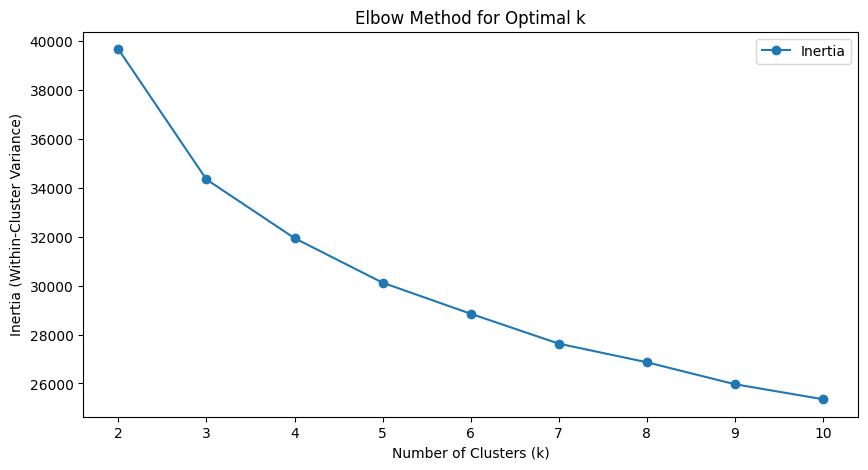

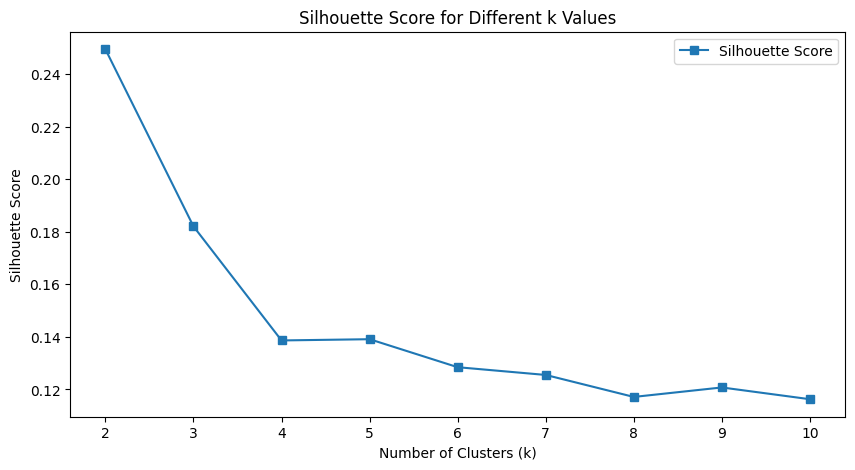

Optimal number of clusters: 2


In [128]:
# Prepare the data for clustering
X = df_scaled[features_to_scale].copy()

# Define range of k values to test
k_values = range(2, 11)  # Testing k from 2 to 10

# Store inertia and silhouette scores
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    inertia.append(kmeans.inertia_)  # Inertia for Elbow Method
    silhouette_scores.append(silhouette_score(X, cluster_labels))  # Silhouette Score

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Variance)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', label="Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.legend()
plt.show()

# Find the optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")


In [129]:
# Run K-Means with optimal k
kmeans = KMeans(n_clusters=25, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(X)

# Save the results
df_scaled.to_csv("nba_clustered.csv", index=False)

# Show sample cluster assignments
df_scaled[['Player', 'Cluster']].head(10)


,Player,Cluster
0,2022-2023 A.J. Green,1
1,2022-2023 AJ Griffin,7
2,2022-2023 Aaron Gordon,11
3,2022-2023 Aaron Holiday,18
4,2022-2023 Aaron Nesmith,24
5,2022-2023 Aaron Wiggins,23
6,2022-2023 Admiral Schofield,12
7,2022-2023 Al Horford,23
8,2022-2023 Alec Burks,21
9,2022-2023 Aleksej Pokusevski,4


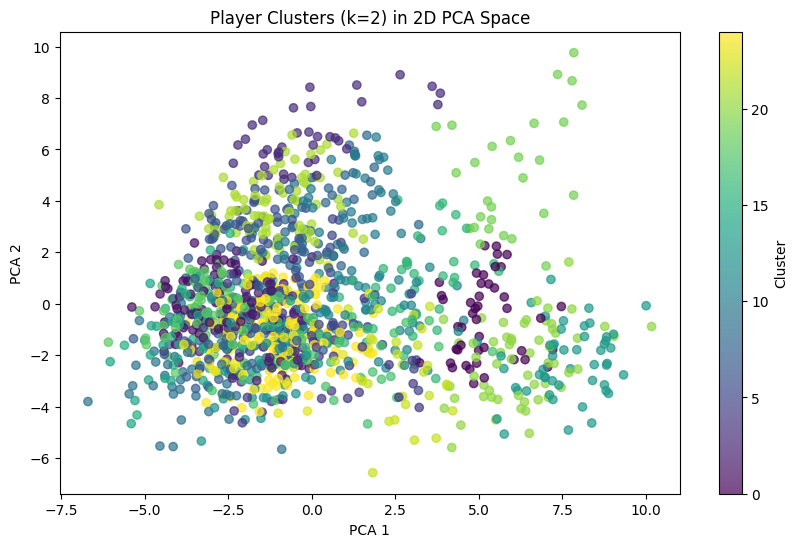

In [130]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_scaled['pca1'] = X_pca[:, 0]
df_scaled['pca2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_scaled['pca1'], df_scaled['pca2'], c=df_scaled['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Player Clusters (k={optimal_k}) in 2D PCA Space")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [131]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features_to_scale)
print(cluster_summary)


          FG       FGA       FG%        3P       3PA       3P%        2P  \
0   0.511205 -0.214319  1.525209 -1.211433 -1.299151  0.629620  1.159034   
1  -0.164420  0.164547 -0.627545  1.103821  1.026271  0.465844 -0.770769   
2  -0.457875 -0.320211 -0.359865 -0.273002 -0.201171  0.024264 -0.281440   
3   1.844888  1.992293 -0.083829  0.978703  0.992783  0.334740  1.215614   
4  -0.639265 -0.470214 -0.455787 -0.490248 -0.332412 -0.330987 -0.337643   
5  -0.229791 -0.603692  0.783746 -0.909207 -1.052250 -0.007211  0.285481   
6   0.584692  0.903268 -0.430925  0.503594  0.523973  0.272554  0.278915   
7  -0.233551 -0.089548 -0.342565  1.188332  1.027915  0.567889 -0.883383   
8   1.226299  1.243068  0.056193  0.307452  0.303419  0.306210  0.999657   
9  -1.139081 -0.513457 -1.528384 -0.092331  0.362370 -0.341525 -1.035208   
10  1.340947  1.332431  0.099357  0.358964  0.354913  0.320135  1.078642   
11  0.191277 -0.143247  0.646730 -0.212985 -0.248846  0.187724  0.298742   
12 -0.762148

In [132]:
df_scaled[['Player', 'Cluster']].groupby('Cluster').head(10)


,Player,Cluster
0,2022-2023 A.J. Green,1
1,2022-2023 AJ Griffin,7
2,2022-2023 Aaron Gordon,11
3,2022-2023 Aaron Holiday,18
4,2022-2023 Aaron Nesmith,24
5,2022-2023 Aaron Wiggins,23
6,2022-2023 Admiral Schofield,12
7,2022-2023 Al Horford,23
8,2022-2023 Alec Burks,21
9,2022-2023 Aleksej Pokusevski,4


In [133]:
df_scaled['Cluster'].value_counts()


Cluster
24    106
21     79
7      73
1      72
18     65
12     65
23     64
2      59
20     58
6      57
11     56
4      54
13     49
9      47
0      45
8      44
16     42
10     42
17     41
3      37
22     34
14     34
15     29
19     28
5      26
Name: count, dtype: int64

In [134]:
# Get cluster centroids (average stats per cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features_to_scale)
cluster_summary.index = [f'Cluster {i}' for i in range(25)]  # Adjust based on k

# Show the transposed summary for easier comparison
cluster_summary.T


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17,Cluster 18,Cluster 19,Cluster 20,Cluster 21,Cluster 22,Cluster 23,Cluster 24
FG,5.112054e-01,-1.644196e-01,-4.578750e-01,1.844888e+00,-6.392655e-01,-0.229791,5.846921e-01,-2.335509e-01,1.226299e+00,-1.139081e+00,1.340947e+00,1.912772e-01,-7.621479e-01,-9.584199e-02,-0.987904,-7.229662e-01,7.213617e-01,-0.627295,-4.660511e-01,2.219728e+00,-8.073176e-02,1.160779e+00,-6.930768e-01,-5.598151e-01,-4.803788e-01
FGA,-2.143186e-01,1.645466e-01,-3.202115e-01,1.992293e+00,-4.702139e-01,-0.603692,9.032682e-01,-8.954802e-02,1.243068e+00,-5.134567e-01,1.332431e+00,-1.432468e-01,-6.474970e-01,-1.118132e+00,-0.494181,-5.721092e-01,4.923697e-01,-0.610006,-1.396092e-01,1.470624e+00,-7.252192e-01,1.376586e+00,-7.436562e-01,-6.357369e-01,-3.548029e-01
FG%,1.525209e+00,-6.275450e-01,-3.598654e-01,-8.382930e-02,-4.557869e-01,0.783746,-4.309248e-01,-3.425649e-01,5.619304e-02,-1.528384e+00,9.935670e-02,6.467304e-01,-4.352878e-01,2.811434e+00,-1.241128,-4.938056e-01,4.058300e-01,-0.139796,-7.105178e-01,1.112741e+00,1.464351e+00,-2.165335e-01,1.300609e-02,5.144108e-02,-3.503351e-01
3P,-1.211433e+00,1.103821e+00,-2.730024e-01,9.787033e-01,-4.902484e-01,-0.909207,5.035940e-01,1.188332e+00,3.074522e-01,-9.233064e-02,3.589637e-01,-2.129853e-01,5.113911e-01,-1.653005e+00,-0.699439,1.767893e-01,2.623424e-01,-0.396831,3.706540e-01,-8.872874e-01,-1.626940e+00,7.902666e-01,-7.985654e-01,5.261063e-01,-2.350704e-01
3PA,-1.299151e+00,1.026271e+00,-2.011712e-01,9.927826e-01,-3.324116e-01,-1.052250,5.239726e-01,1.027915e+00,3.034186e-01,3.623699e-01,3.549125e-01,-2.488456e-01,4.457135e-01,-1.800337e+00,-0.465301,7.812540e-02,2.312455e-01,-0.320779,4.548221e-01,-9.528829e-01,-1.723587e+00,7.895845e-01,-7.779549e-01,3.090380e-01,-1.285122e-01
3P%,6.296199e-01,4.658441e-01,2.426446e-02,3.347398e-01,-3.309865e-01,-0.007211,2.725542e-01,5.678891e-01,3.062097e-01,-3.415254e-01,3.201354e-01,1.877245e-01,4.250745e-01,-2.085335e+00,-0.584720,3.784949e-01,3.188984e-01,-0.021182,2.070003e-01,-3.447223e-02,-2.414339e+00,3.567888e-01,-2.360674e-01,6.435796e-01,1.058503e-02
2P,1.159034e+00,-7.707686e-01,-2.814396e-01,1.215614e+00,-3.376432e-01,0.285481,2.789149e-01,-8.833832e-01,9.996567e-01,-1.035208e+00,1.078642e+00,2.987424e-01,-1.015909e+00,8.284485e-01,-0.555364,-7.812270e-01,5.404656e-01,-0.371697,-6.528399e-01,2.608339e+00,8.298100e-01,6.709395e-01,-2.128200e-01,-8.290330e-01,-3.294108e-01
2PA,8.389914e-01,-6.675912e-01,-1.922559e-01,1.406887e+00,-2.540171e-01,0.196707,5.767173e-01,-9.516729e-01,1.140306e+00,-8.752591e-01,1.198758e+00,4.701213e-02,-1.094094e+00,2.391182e-01,-0.167199,-7.069572e-01,3.609314e-01,-0.416238,-5.328314e-01,2.437445e+00,6.148681e-01,8.886338e-01,-1.868755e-01,-9.690611e-01,-2.908246e-01
2P%,1.088751e+00,-7.149026e-01,-3.368824e-01,-1.913355e-01,-2.842990e-01,0.458153,-6.621318e-01,3.708147e-02,-9.245279e-02,-1.254858e+00,-2.651269e-02,9.978711e-01,1.695919e-01,2.031447e+00,-1.537882,-7.046446e-01,7.550871e-01,0.087767,-6.510367e-01,6.351214e-01,7.598960e-01,-3.505684e-01,-9.706213e-02,4.933851e-01,-1.611987e-01
eFG%,1.056437e+00,-6.165740e-02,-5.200519e-01,-1.030312e-01,-7.828173e-01,0.473455,-5.071845e-01,4.908206e-01,-8.883456e-02,-1.702031e+00,-2.486959e-02,6.721576e-01,2.117729e-01,2.317094e+00,-1.871755,-2.098182e-01,5.330576e-01,-0.231132,-5.368772e-01,5.848024e-01,6.748143e-01,-2.129336e-01,-4.192846e-01,7.827835e-01,-4.564449e-01


In [135]:
# Show the first 10 players in each cluster
df_scaled[['Player', 'Cluster']].sort_values(by='Cluster').groupby('Cluster').head(10)


,Player,Cluster
75,2022-2023 Damian Jones,0
713,2023-2024 Luke Kornet,0
517,2023-2024 Daniel Theis,0
563,2023-2024 Evan Mobley,0
107,2022-2023 Dewayne Dedmon,0
358,2022-2023 Robin Lopez,0
725,2023-2024 Marvin Bagley III,0
514,2023-2024 Damian Jones,0
788,2023-2024 Richaun Holmes,0
354,2022-2023 Richaun Holmes,0


In [136]:
cluster_summary.T


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17,Cluster 18,Cluster 19,Cluster 20,Cluster 21,Cluster 22,Cluster 23,Cluster 24
FG,5.112054e-01,-1.644196e-01,-4.578750e-01,1.844888e+00,-6.392655e-01,-0.229791,5.846921e-01,-2.335509e-01,1.226299e+00,-1.139081e+00,1.340947e+00,1.912772e-01,-7.621479e-01,-9.584199e-02,-0.987904,-7.229662e-01,7.213617e-01,-0.627295,-4.660511e-01,2.219728e+00,-8.073176e-02,1.160779e+00,-6.930768e-01,-5.598151e-01,-4.803788e-01
FGA,-2.143186e-01,1.645466e-01,-3.202115e-01,1.992293e+00,-4.702139e-01,-0.603692,9.032682e-01,-8.954802e-02,1.243068e+00,-5.134567e-01,1.332431e+00,-1.432468e-01,-6.474970e-01,-1.118132e+00,-0.494181,-5.721092e-01,4.923697e-01,-0.610006,-1.396092e-01,1.470624e+00,-7.252192e-01,1.376586e+00,-7.436562e-01,-6.357369e-01,-3.548029e-01
FG%,1.525209e+00,-6.275450e-01,-3.598654e-01,-8.382930e-02,-4.557869e-01,0.783746,-4.309248e-01,-3.425649e-01,5.619304e-02,-1.528384e+00,9.935670e-02,6.467304e-01,-4.352878e-01,2.811434e+00,-1.241128,-4.938056e-01,4.058300e-01,-0.139796,-7.105178e-01,1.112741e+00,1.464351e+00,-2.165335e-01,1.300609e-02,5.144108e-02,-3.503351e-01
3P,-1.211433e+00,1.103821e+00,-2.730024e-01,9.787033e-01,-4.902484e-01,-0.909207,5.035940e-01,1.188332e+00,3.074522e-01,-9.233064e-02,3.589637e-01,-2.129853e-01,5.113911e-01,-1.653005e+00,-0.699439,1.767893e-01,2.623424e-01,-0.396831,3.706540e-01,-8.872874e-01,-1.626940e+00,7.902666e-01,-7.985654e-01,5.261063e-01,-2.350704e-01
3PA,-1.299151e+00,1.026271e+00,-2.011712e-01,9.927826e-01,-3.324116e-01,-1.052250,5.239726e-01,1.027915e+00,3.034186e-01,3.623699e-01,3.549125e-01,-2.488456e-01,4.457135e-01,-1.800337e+00,-0.465301,7.812540e-02,2.312455e-01,-0.320779,4.548221e-01,-9.528829e-01,-1.723587e+00,7.895845e-01,-7.779549e-01,3.090380e-01,-1.285122e-01
3P%,6.296199e-01,4.658441e-01,2.426446e-02,3.347398e-01,-3.309865e-01,-0.007211,2.725542e-01,5.678891e-01,3.062097e-01,-3.415254e-01,3.201354e-01,1.877245e-01,4.250745e-01,-2.085335e+00,-0.584720,3.784949e-01,3.188984e-01,-0.021182,2.070003e-01,-3.447223e-02,-2.414339e+00,3.567888e-01,-2.360674e-01,6.435796e-01,1.058503e-02
2P,1.159034e+00,-7.707686e-01,-2.814396e-01,1.215614e+00,-3.376432e-01,0.285481,2.789149e-01,-8.833832e-01,9.996567e-01,-1.035208e+00,1.078642e+00,2.987424e-01,-1.015909e+00,8.284485e-01,-0.555364,-7.812270e-01,5.404656e-01,-0.371697,-6.528399e-01,2.608339e+00,8.298100e-01,6.709395e-01,-2.128200e-01,-8.290330e-01,-3.294108e-01
2PA,8.389914e-01,-6.675912e-01,-1.922559e-01,1.406887e+00,-2.540171e-01,0.196707,5.767173e-01,-9.516729e-01,1.140306e+00,-8.752591e-01,1.198758e+00,4.701213e-02,-1.094094e+00,2.391182e-01,-0.167199,-7.069572e-01,3.609314e-01,-0.416238,-5.328314e-01,2.437445e+00,6.148681e-01,8.886338e-01,-1.868755e-01,-9.690611e-01,-2.908246e-01
2P%,1.088751e+00,-7.149026e-01,-3.368824e-01,-1.913355e-01,-2.842990e-01,0.458153,-6.621318e-01,3.708147e-02,-9.245279e-02,-1.254858e+00,-2.651269e-02,9.978711e-01,1.695919e-01,2.031447e+00,-1.537882,-7.046446e-01,7.550871e-01,0.087767,-6.510367e-01,6.351214e-01,7.598960e-01,-3.505684e-01,-9.706213e-02,4.933851e-01,-1.611987e-01
eFG%,1.056437e+00,-6.165740e-02,-5.200519e-01,-1.030312e-01,-7.828173e-01,0.473455,-5.071845e-01,4.908206e-01,-8.883456e-02,-1.702031e+00,-2.486959e-02,6.721576e-01,2.117729e-01,2.317094e+00,-1.871755,-2.098182e-01,5.330576e-01,-0.231132,-5.368772e-01,5.848024e-01,6.748143e-01,-2.129336e-01,-4.192846e-01,7.827835e-01,-4.564449e-01


In [137]:
# Define cluster merges
cluster_merges = {
    0: 20,   # Merge Interior Defenders
    1: 21,   # Merge Scoring Guards
    7: 24,   # Merge 3&D Wings
    6: 15,   # Merge Playmakers
    13: 16   # Merge Defensive Bigs
}

# Apply merges
df_scaled['Cluster'] = df_scaled['Cluster'].replace(cluster_merges)


In [138]:
df_scaled['Cluster'].value_counts()


Cluster
24    179
21    151
20    103
16     91
15     86
18     65
12     65
23     64
2      59
11     56
4      54
9      47
8      44
10     42
17     41
3      37
14     34
22     34
19     28
5      26
Name: count, dtype: int64

In [139]:
df_scaled[['Player', 'Cluster']].sort_values(by='Cluster').groupby('Cluster').head(10)


,Player,Cluster
528,2023-2024 De'Anthony Melton,2
568,2023-2024 Garrett Temple,2
621,2023-2024 Jared Butler,2
258,2022-2023 Kevon Harris,2
1060,2024-2025 Jaylen Clark,2
42,2022-2023 Bryce McGowens,2
1129,2024-2025 Kevin Porter Jr.,2
956,2024-2025 De'Anthony Melton,2
251,2022-2023 Keon Johnson,2
360,2022-2023 Romeo Langford,2


In [141]:
df_scaled[['Player', 'Cluster']].tail()  # Should show players and their cluster assignments


,Player,Cluster
1301,2024-2025 Zach Edey,20
1302,2024-2025 Zach LaVine,8
1303,2024-2025 Zeke Nnaji,4
1304,2024-2025 Ziaire Williams,24
1305,2024-2025 Zion Williamson,19


In [142]:
df_scaled.to_csv("nba_clustered.csv", index=False)
